#  Credit Card Fraud Detection using Ensemble Learning¶
Credit card fraud is a growing concern in the financial industry, leading to significant monetary losses and security risks. This project aims to develop a machine learning-based fraud detection system that can accurately identify fraudulent transactions

# Some insights  
1.The percentage of fraud is 0.5788651743883394 % and the percentage of non-fraud is 99.42113482561166 %  
2.['grocery_pos', 'shopping_net', 'misc_net','shopping_pos', 'gas_transport']) these instances of category columns covers 70 % of dataset and contribute around 50 % in fraud money  
3. Frauds mostly occur when the amount >200$.Thus we need to be careful at that time.  
4.This concludes major fraud case happens on weekends as well as on monday  
5. This shows that major frauds happens in the monthof April, Jun, Jan, Feb.  
6. This shows that major frauds happens at night.  



1️⃣ Load Data  
2️⃣ Preprocess & Clean Data  
3️⃣ Feature Engineering  
4️⃣ EDA  
5️⃣ Train-Test Split  
6️⃣ Train Models  
7️⃣ Evaluate & Tune Models  
8️⃣ Deploy & Monitor  

## Importing dependencies

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1️⃣ Data Loading

In [4]:
# df = pd.read_csv("/content/drive/MyDrive/dataset/fraud-detection-dataset/fraudTrain.csv", index_col=0)
df = pd.read_csv("C:/Users/surafel/Desktop/ML project/ml-classification-regression-project/dataset/fraudTrain.csv", index_col=0)

In [5]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [7]:
row,col=df.shape
print(f'The dataset has {row} rows and {col} columns.')

The dataset has 1296675 rows and 22 columns.


In [8]:
print(df.describe())

             cc_num           amt           zip           lat          long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01 -9.022634e+01   
std    1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00  1.375908e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01 -9.679800e+01   
50%    3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud  
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  
mean   8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01  5.788652e-03  
std    3.019564e+05  1.284128e+07  5.109788e+00  1.377

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop               

In [10]:
fraud_percentage=len(df[df['is_fraud']==1])/len(df)*100
non_fraud_percentage=100-fraud_percentage
print(f'The percentage of fraud is {fraud_percentage} % and the percentage of non-fraud is {non_fraud_percentage} %')
print('This shows how imbalanced is the dataset')

The percentage of fraud is 0.5788651743883394 % and the percentage of non-fraud is 99.42113482561166 %
This shows how imbalanced is the dataset


## Checking for missing values

In [11]:
df.isna().sum()
# No missing values

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

# Analyzing different columns

In [12]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


#  1. cc_num

In [13]:
df['cc_num'].value_counts()

cc_num
4512828414983801773    3123
571365235126           3123
36722699017270         3119
213112402583773        3117
3545109339866548       3113
                       ... 
4734310647841293          7
4714017207228610634       7
6011732631674654          7
501894933032              7
4975457191020             7
Name: count, Length: 983, dtype: int64

In [14]:
df.drop(columns=['cc_num'],inplace=True)

#  2. merchant

In [15]:
df.merchant.value_counts()

merchant
fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
fraud_Douglas, DuBuque and McKenzie      775
fraud_Treutel-King                       775
fraud_Medhurst, Labadie and Gottlieb     759
fraud_Reichert-Weissnat                  753
fraud_Hahn, Douglas and Schowalter       727
Name: count, Length: 693, dtype: int64

In [16]:
df[df['is_fraud']==1].merchant.value_counts().head(50)

merchant
fraud_Rau and Sons                        49
fraud_Kozey-Boehm                         48
fraud_Cormier LLC                         48
fraud_Doyle Ltd                           47
fraud_Kilback LLC                         47
fraud_Vandervort-Funk                     47
fraud_Padberg-Welch                       44
fraud_Kuhn LLC                            44
fraud_Terry-Huel                          43
fraud_Jast Ltd                            42
fraud_Goyette Inc                         42
fraud_Koepp-Witting                       42
fraud_Schmeler, Bashirian and Price       41
fraud_Kerluke-Abshire                     41
fraud_Kiehn-Emmerich                      41
fraud_McDermott-Weimann                   41
fraud_Hudson-Ratke                        40
fraud_Moen, Reinger and Murphy            40
fraud_Boyer PLC                           40
fraud_Murray-Smitham                      40
fraud_Gleason-Macejkovic                  40
fraud_Bailey-Morar                        39
f

As fraudster can use different names , it is not important as a feature

In [17]:
df.drop(columns=['merchant'],inplace=True)

#  2. Category

In [18]:
df.category.value_counts()

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

In [19]:
df[df['is_fraud']==1].category.value_counts()

category
grocery_pos       1743
shopping_net      1713
misc_net           915
shopping_pos       843
gas_transport      618
misc_pos           250
kids_pets          239
entertainment      233
personal_care      220
home               198
food_dining        151
grocery_net        134
health_fitness     133
travel             116
Name: count, dtype: int64

In [20]:
(1743+1713+915+843+618)/(df[df['is_fraud']==1].category.value_counts().sum())*100

np.float64(77.6978417266187)

In [21]:
df.groupby('category')['amt'].sum().sort_values(ascending=False)

category
grocery_pos       14460822.38
shopping_pos       9307993.61
shopping_net       8625149.68
gas_transport      8351732.29
home               7173928.11
kids_pets          6503680.16
entertainment      6036678.56
misc_net           5117709.26
misc_pos           5009582.50
food_dining        4672459.44
health_fitness     4653108.02
travel             4516721.68
personal_care      4353450.53
grocery_net        2439412.68
Name: amt, dtype: float64

In [22]:
(14460822.38+9307993.61+8625149.68+8351732.29+7173928.11)/(df.groupby('category')['amt'].sum().sum())*100

np.float64(52.53053075634562)

Here we can see around 77 % of category is decided by grocery_pos shopping_net misc_net shopping_pos gas_transport.  
Thus we can replace other categories by "other" and use one hot encoding

In [23]:
def convert_to_other(instance):
    if(instance in ['grocery_pos', 'shopping_net', 'misc_net','shopping_pos', 'gas_transport']):
        return instance
    else :
        return 'others'

In [24]:
df['category']=df['category'].apply(convert_to_other)

In [25]:
df.category.value_counts()

category
others           763876
gas_transport    131659
grocery_pos      123638
shopping_pos     116672
shopping_net      97543
misc_net          63287
Name: count, dtype: int64

In [26]:
df.head()

,trans_date_trans_time,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,others,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,others,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


### Applying OneHotEncoding in category column

In [27]:


from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)
# drop='first' removes one column to avoid redundancy which also remove multicollinearity
# if we don't remove the input feature will have depencies. sum of values in the col will be 1 which can effect the performance

encoded_array = encoder.fit_transform(df[['category']])

encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['category']))

df = pd.concat([df.drop(columns=['category']), encoded_df], axis=1)
df.head()



,trans_date_trans_time,amt,first,last,gender,street,city,state,zip,lat,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,category_grocery_pos,category_misc_net,category_others,category_shopping_net,category_shopping_pos
0,2019-01-01 00:00:18,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0.0,1.0,0.0,0.0,0.0
1,2019-01-01 00:00:44,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,1.0,0.0,0.0,0.0,0.0
2,2019-01-01 00:00:51,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0.0,0.0,1.0,0.0,0.0
3,2019-01-01 00:01:16,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0.0,0.0,0.0,0.0,0.0
4,2019-01-01 00:03:06,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0.0,0.0,1.0,0.0,0.0


#  4. first & last

These are names which can't decide whether a person is fraudster so we can simply drop this column

In [28]:
df.drop(columns=['first','last'],inplace=True)

#  5. gender

Here we can use onehotencoder and removing one columns or simply use apply() to convert M-1 and F-0

In [29]:
def M_1_F_0(instance):
    if(instance=='M'):
        return 1
    return 0

In [30]:
df['gender']=df['gender'].apply(M_1_F_0)

# 6. street,city,state,zip,dob	trans_num

These  also does effect the dataset thus we can simply remove this.

In [31]:
df.street.value_counts()

street
864 Reynolds Plains                  3123
0069 Robin Brooks Apt. 695           3123
8172 Robertson Parkways Suite 072    3119
4664 Sanchez Common Suite 930        3117
8030 Beck Motorway                   3113
                                     ... 
4940 Donald Throughway Apt. 219         7
7065 Whitney Mountains                  7
5273 Joseph Isle Suite 518              7
9599 Washington Field Suite 238         7
3437 Ross Flat Apt. 592                 7
Name: count, Length: 983, dtype: int64

In [32]:
df[df.is_fraud==1].city.value_counts()

city
Houston           39
Warren            33
Huntsville        29
Naples            29
Tulsa             27
                  ..
Bethel             3
Phenix City        2
Phoenix            2
Kilgore            2
Denham Springs     2
Name: count, Length: 702, dtype: int64

In [33]:
df['zip'].value_counts()

zip
73754    3646
34112    3613
48088    3597
82514    3527
49628    3123
         ... 
46510       7
23523       7
77027       7
95688       7
37411       7
Name: count, Length: 970, dtype: int64

In [34]:
df.drop(columns=['street','city','state','zip','dob','trans_num'],inplace=True)

In [35]:
df.head()

,trans_date_trans_time,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,category_grocery_pos,category_misc_net,category_others,category_shopping_net,category_shopping_pos
0,2019-01-01 00:00:18,4.97,0,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0,0.0,1.0,0.0,0.0,0.0
1,2019-01-01 00:00:44,107.23,0,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0,1.0,0.0,0.0,0.0,0.0
2,2019-01-01 00:00:51,220.11,1,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0,0.0,0.0,1.0,0.0,0.0
3,2019-01-01 00:01:16,45.00,1,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0,0.0,0.0,0.0,0.0,0.0
4,2019-01-01 00:03:06,41.96,1,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0,0.0,0.0,1.0,0.0,0.0


# 7. unix_time

the unix_time column represents the timestamp of the transaction in Unix format (i.e., seconds since January 1, 1970, 00:00:00 UTC).  
Having trans_date_trans_time we can simply drop this column

In [36]:
df.drop(columns=['unix_time'],inplace=True)

In [37]:
df.head()

,trans_date_trans_time,amt,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,category_grocery_pos,category_misc_net,category_others,category_shopping_net,category_shopping_pos
0,2019-01-01 00:00:18,4.97,0,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,0.0,1.0,0.0,0.0,0.0
1,2019-01-01 00:00:44,107.23,0,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,1.0,0.0,0.0,0.0,0.0
2,2019-01-01 00:00:51,220.11,1,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0,0.0,0.0,1.0,0.0,0.0
3,2019-01-01 00:01:16,45.00,1,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071,0,0.0,0.0,0.0,0.0,0.0
4,2019-01-01 00:03:06,41.96,1,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,0,0.0,0.0,1.0,0.0,0.0


# 8. job

In [38]:
df.job.value_counts()

job
Film/video editor             9779
Exhibition designer           9199
Naval architect               8684
Surveyor, land/geomatics      8680
Materials engineer            8270
                              ... 
Veterinary surgeon               8
Information officer              8
Contracting civil engineer       7
Ship broker                      7
Warehouse manager                7
Name: count, Length: 494, dtype: int64

In [39]:
df[df.is_fraud==1].job.value_counts()

job
Materials engineer                      62
Trading standards officer               56
Naval architect                         53
Exhibition designer                     51
Surveyor, land/geomatics                50
                                        ..
Chartered loss adjuster                  3
Health physicist                         3
Statistician                             3
Contractor                               2
English as a second language teacher     2
Name: count, Length: 443, dtype: int64

In [40]:
(62+56+53+51+50)/(len(df[df.is_fraud==1]))*100

3.6237676525446307

As top 5 is only contributing <4 % we can simply remove this column

In [41]:
df.drop(columns=['job'],inplace=True)

In [42]:
df.head()

,trans_date_trans_time,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud,category_grocery_pos,category_misc_net,category_others,category_shopping_net,category_shopping_pos
0,2019-01-01 00:00:18,4.97,0,36.0788,-81.1781,3495,36.011293,-82.048315,0,0.0,1.0,0.0,0.0,0.0
1,2019-01-01 00:00:44,107.23,0,48.8878,-118.2105,149,49.159047,-118.186462,0,1.0,0.0,0.0,0.0,0.0
2,2019-01-01 00:00:51,220.11,1,42.1808,-112.2620,4154,43.150704,-112.154481,0,0.0,0.0,1.0,0.0,0.0
3,2019-01-01 00:01:16,45.00,1,46.2306,-112.1138,1939,47.034331,-112.561071,0,0.0,0.0,0.0,0.0,0.0
4,2019-01-01 00:03:06,41.96,1,38.4207,-79.4629,99,38.674999,-78.632459,0,0.0,0.0,1.0,0.0,0.0


# EDA


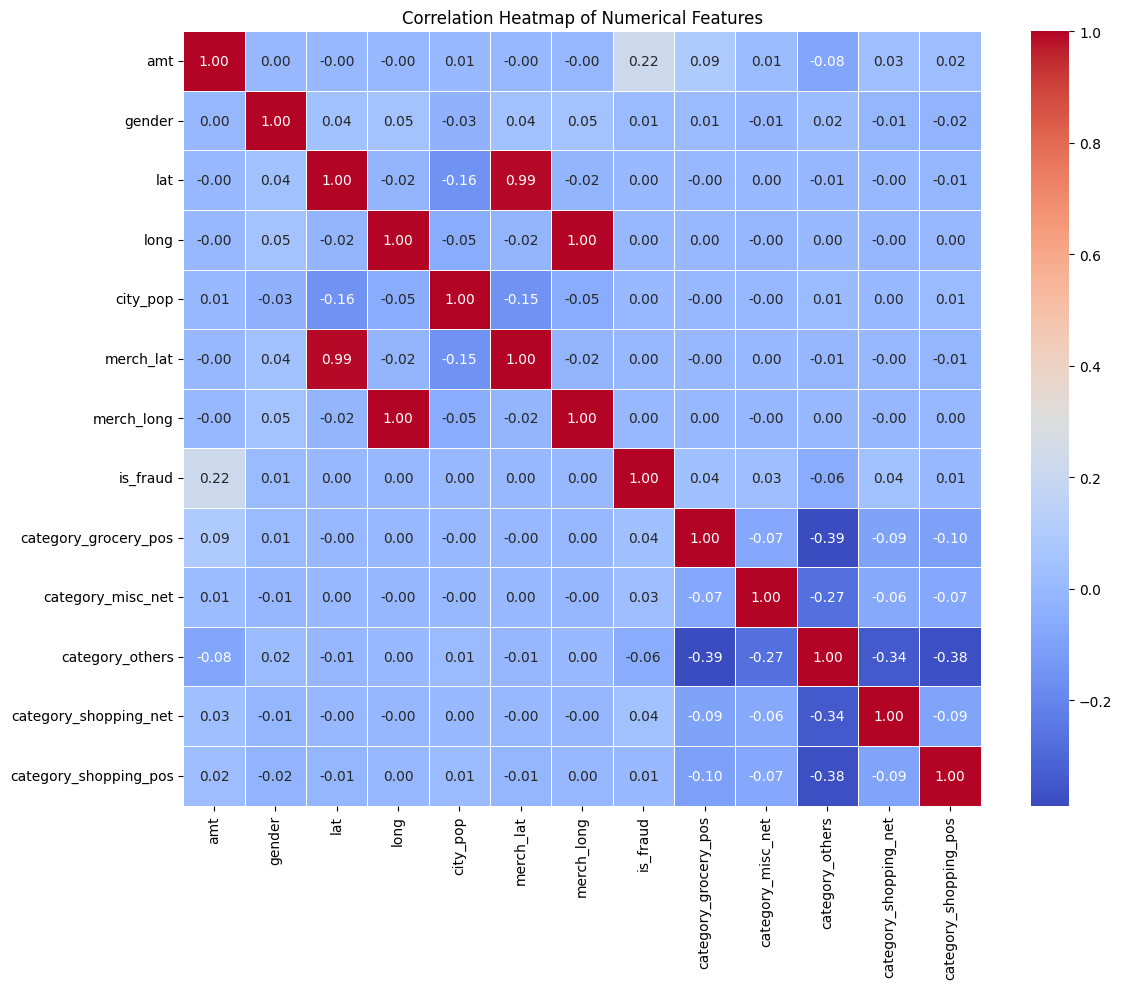

Features most correlated with fraud:
is_fraud                 1.000000
amt                      0.219404
category_shopping_net    0.044261
category_grocery_pos     0.035558
category_misc_net        0.025886
gender                   0.007642
category_shopping_pos    0.005955
city_pop                 0.002136
lat                      0.001894
merch_lat                0.001741
merch_long               0.001721
long                     0.001721
category_others         -0.056776
Name: is_fraud, dtype: float64


In [50]:
# Create a correlation matrix
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

# Let's also look at the correlation with the target variable (is_fraud)
fraud_correlations = correlation_matrix['is_fraud'].sort_values(ascending=False)
print("Features most correlated with fraud:")
print(fraud_correlations)


# 1. Transaction Amount (amt) and Fraud (is_fraud)

- Correlation: 0.22 (moderate positive correlation)
- This confirms our earlier analysis that higher transaction amounts have a greater likelihood of being fraudulent.

# 2. Geolocation Features (lat, long, merch_lat, merch_long)

- lat and merch_lat have an extremely high correlation (~0.99).
- long and merch_long are also strongly correlated (~1.00).
- This suggests that transactions are happening in close proximity to the merchant’s location.

# 3. Category-Based Features and Fraud

- category_grocery_pos has a weak positive correlation with is_fraud (~0.09).
- category_misc_net and category_shopping_net have slight negative correlations (~-0.06 and -0.09).
- This suggests that fraud is somewhat associated with grocery purchases, but other shopping categories show weaker relationships.


# 4. Weak Correlation Between is_fraud and Most Features

- Most numerical features show low correlation with fraud detection.
- This aligns with the fact that fraud detection requires non-linear models like XGBoost to capture hidden patterns.

# Getting different insights on the basis of fraud vs non-fraud

## Fraud,Non-Fraud vs Amount

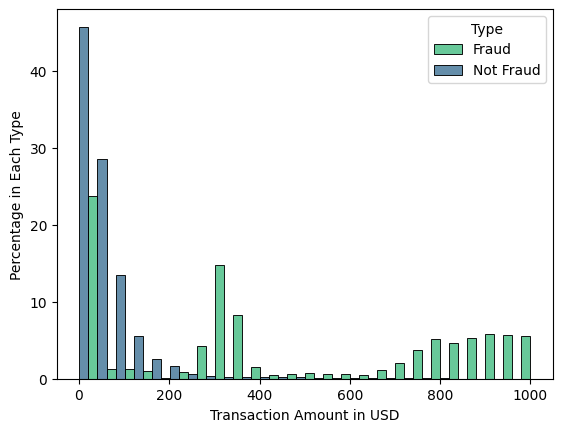

In [43]:
ax=sns.histplot(x='amt',data=df[df.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25,palette='viridis')
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

Very important observation. This shows that we need to be careful when the transaction amout is very high, thus we need to be more careful if the amount exceeds 200 $.

## Fraud,Non-Fraud vs Time(Hours)

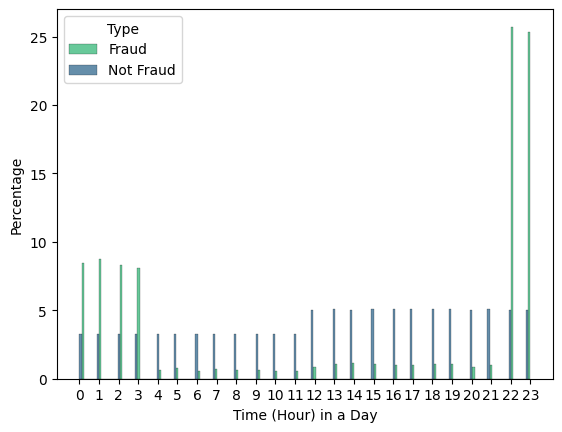

In [44]:
df['hour']=pd.to_datetime(df['trans_date_trans_time']).dt.hour
ax=sns.histplot(data=df, x="hour", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge',palette='viridis')
ax.set_ylabel('Percentage')
ax.set_xlabel('Time (Hour) in a Day')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

This shows that major frauds happens at night.  
It is kind of obvious also when fraudster tries to take control of person account when he is sleeping

# Fraud,Non-Fraud vs Days

C:\Users\surafel\AppData\Local\Temp\ipykernel_14612\2152323326.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])


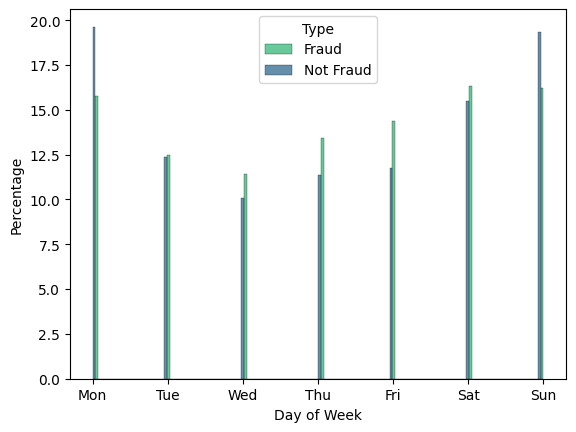

In [45]:
df['day']=pd.to_datetime(df['trans_date_trans_time']).dt.dayofweek
ax=sns.histplot(data=df, x="day", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge',palette='viridis')
ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
ax.set_ylabel('Percentage')
ax.set_xlabel('Day of Week')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

C:\Users\surafel\AppData\Local\Temp\ipykernel_14612\1359157991.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data=df_fraud, x="day", common_norm=False, stat='percent', multiple='dodge',palette='viridis')
C:\Users\surafel\AppData\Local\Temp\ipykernel_14612\1359157991.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['', "Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])


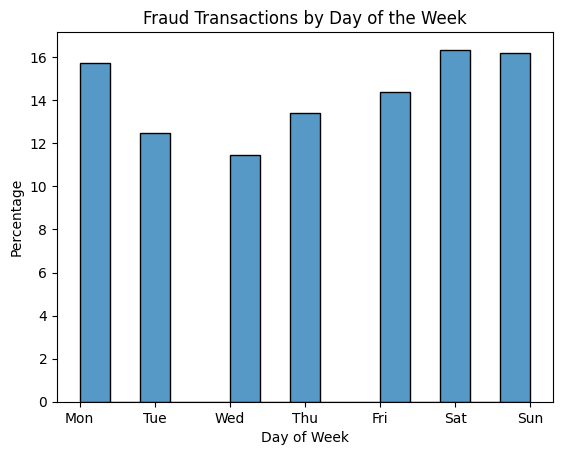

In [46]:
df_fraud = df[df['is_fraud'] == 1]  # Keep only fraud transactions

ax = sns.histplot(data=df_fraud, x="day", common_norm=False, stat='percent', multiple='dodge',palette='viridis')

ax.set_xticklabels(['', "Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
ax.set_ylabel('Percentage')
ax.set_xlabel('Day of Week')
plt.title('Fraud Transactions by Day of the Week')
plt.show()


This concludes major fraud case happens on weekends as well as on monday

# Fraud,Non-Fraud vs Months

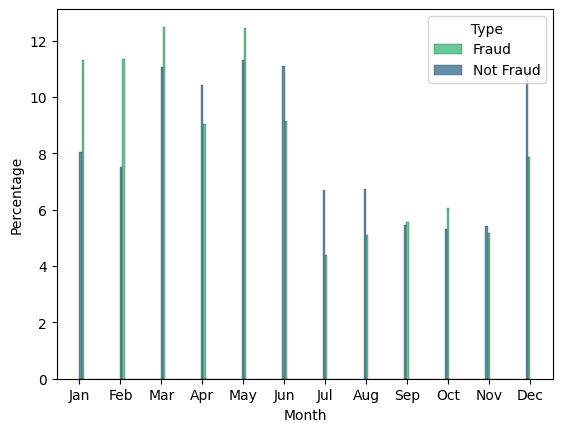

In [47]:
df['month']=pd.to_datetime(df['trans_date_trans_time']).dt.month
ax=sns.histplot(data=df, x="month", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge',palette='viridis')
ax.set_ylabel('Percentage')
ax.set_xlabel('Month')
plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

C:\Users\surafel\AppData\Local\Temp\ipykernel_14612\240129551.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data=df_fraud, x="month", common_norm=False, stat='percent', multiple='dodge',palette='viridis')


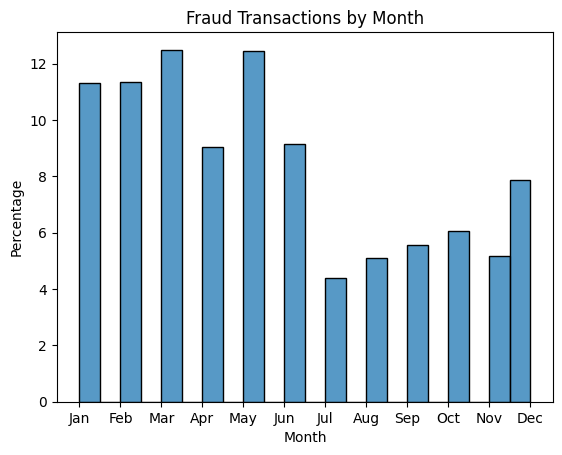

In [48]:
df_fraud = df[df['is_fraud'] == 1]  # Keep only fraud transactions

ax = sns.histplot(data=df_fraud, x="month", common_norm=False, stat='percent', multiple='dodge',palette='viridis')

ax.set_ylabel('Percentage')
ax.set_xlabel('Month')

plt.xticks(np.arange(1, 13, 1), ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                                 "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

plt.title('Fraud Transactions by Month')
plt.show()


This shows that major frauds happens in the month of April, Jun, Jan, Feb.

In [49]:
# Extract features and target
X = df.drop(['is_fraud'], axis=1)
y = df['is_fraud']

# Split the data
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)


In [90]:
def create_essential_fraud_features(df):
    """
    Create fraud detection features based on EDA insights
    """
    df = df.copy()
    print("Creating fraud detection features...")

    # Time-based features (based on the EDA findings)
    df['datetime'] = pd.to_datetime(df['trans_date_trans_time'])
    df['day_of_week'] = df['datetime'].dt.dayofweek

    # High-risk time flags
    df['is_night'] = ((df['hour'] >= 23) | (df['hour'] <= 5)).astype(int)
    df['is_weekend'] = (df['day_of_week'].isin([5, 6])).astype(int)

    # Amount-based features (from the EDA)
    df['is_high_amount'] = (df['amt'] > 200).astype(int)

    # Risk score
    df['risk_score'] = (
        df['is_night'] * 0.2 +
        df['is_weekend'] * 0.1 +
        df['is_high_amount'] * 0.3
      )

    df = df.drop(['datetime'], axis=1)

    return df

In [91]:
X_train_featured = create_essential_fraud_features(X_train)
X_test_featured = create_essential_fraud_features(X_test)

Creating fraud detection features...
Creating fraud detection features...


In [99]:
X_train_featured.head()

,trans_date_trans_time,amt,gender,lat,long,city_pop,merch_lat,merch_long,category_grocery_pos,category_misc_net,...,category_shopping_net,category_shopping_pos,hour,day,month,day_of_week,is_night,is_weekend,is_high_amount,risk_score
192318,2019-04-08 23:46:57,199.87,0,34.5091,-92.4828,4074,34.963419,-92.300838,0.0,0.0,...,1.0,0.0,23,0,4,0,1,0,0,0.2
318906,2019-06-02 12:25:41,13.65,0,31.6591,-96.8094,263,31.969251,-97.225975,0.0,0.0,...,0.0,0.0,12,6,6,6,0,1,0,0.1
212432,2019-04-18 17:44:59,47.98,0,42.3066,-71.9202,4845,42.419528,-71.966339,0.0,0.0,...,0.0,0.0,17,3,4,3,0,0,0,0.0
979043,2020-02-01 23:01:47,157.10,0,26.4722,-81.8122,224256,27.091677,-81.537608,0.0,0.0,...,0.0,0.0,23,5,2,5,1,1,0,0.3
614236,2019-09-17 23:20:40,111.12,0,37.9943,-88.9417,324,37.713140,-89.380534,0.0,0.0,...,0.0,0.0,23,1,9,1,1,0,0,0.2


In [111]:
X_train_featured = X_train_featured.drop(['trans_date_trans_time'], axis=1)
X_test_featured = X_test_featured.drop(['trans_date_trans_time'], axis=1)

In [112]:
# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_featured)
X_test_scaled = scaler.transform(X_test_featured)

In [113]:
# Define a function to evaluate and visualize model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Print metrics
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    # Print confusion matrix and classification report
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Return the trained model and metrics
    return model, {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'y_pred_proba': y_pred_proba
    }



Training Logistic Regression...

Logistic Regression Performance:
Accuracy: 0.9947
Precision: 0.6851
Recall: 0.1536
F1 Score: 0.2510
ROC AUC: 0.9142

Confusion Matrix:
[[386592    159]
 [  1906    346]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386751
           1       0.69      0.15      0.25      2252

    accuracy                           0.99    389003
   macro avg       0.84      0.58      0.62    389003
weighted avg       0.99      0.99      0.99    389003


Training Decision Tree...

Decision Tree Performance:
Accuracy: 0.9965
Precision: 0.6849
Recall: 0.7220
F1 Score: 0.7030
ROC AUC: 0.8600

Confusion Matrix:
[[386003    748]
 [   626   1626]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386751
           1       0.68      0.72      0.70      2252

    accuracy                           1.00    389003
   macro av

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5254, number of negative: 902418
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.091664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1617
[LightGBM] [Info] Number of data points in the train set: 907672, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005788 -> initscore=-5.146088
[LightGBM] [Info] Start training from score -5.146088


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



LightGBM Performance:
Accuracy: 0.9964
Precision: 0.7141
Recall: 0.6301
F1 Score: 0.6695
ROC AUC: 0.9157

Confusion Matrix:
[[386183    568]
 [   833   1419]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386751
           1       0.71      0.63      0.67      2252

    accuracy                           1.00    389003
   macro avg       0.86      0.81      0.83    389003
weighted avg       1.00      1.00      1.00    389003


Training XGBoost...

XGBoost Performance:
Accuracy: 0.9981
Precision: 0.9194
Recall: 0.7345
F1 Score: 0.8166
ROC AUC: 0.9955

Confusion Matrix:
[[386606    145]
 [   598   1654]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386751
           1       0.92      0.73      0.82      2252

    accuracy                           1.00    389003
   macro avg       0.96      0.87      0.91    389003
weighted avg 

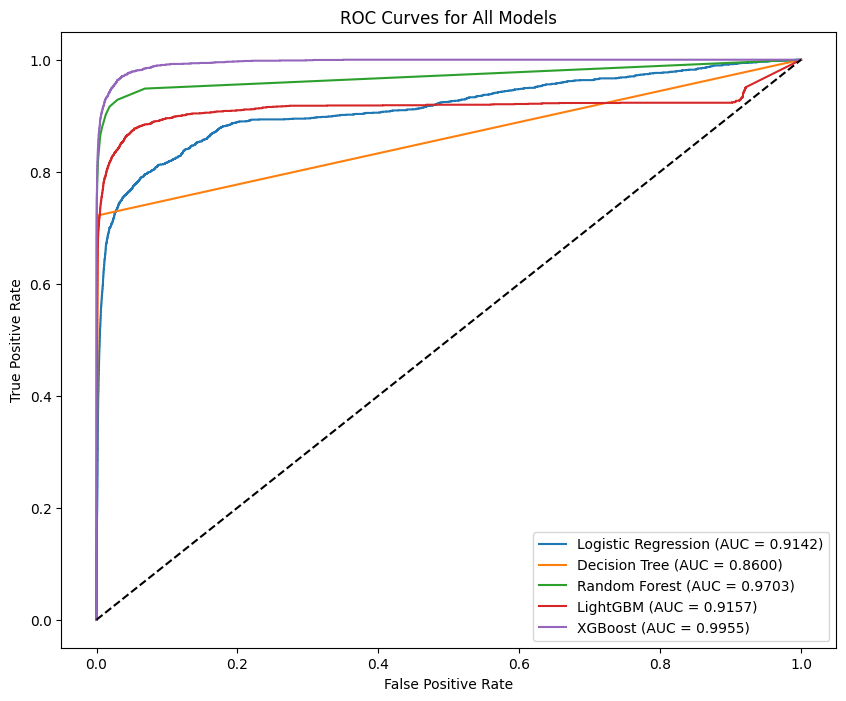

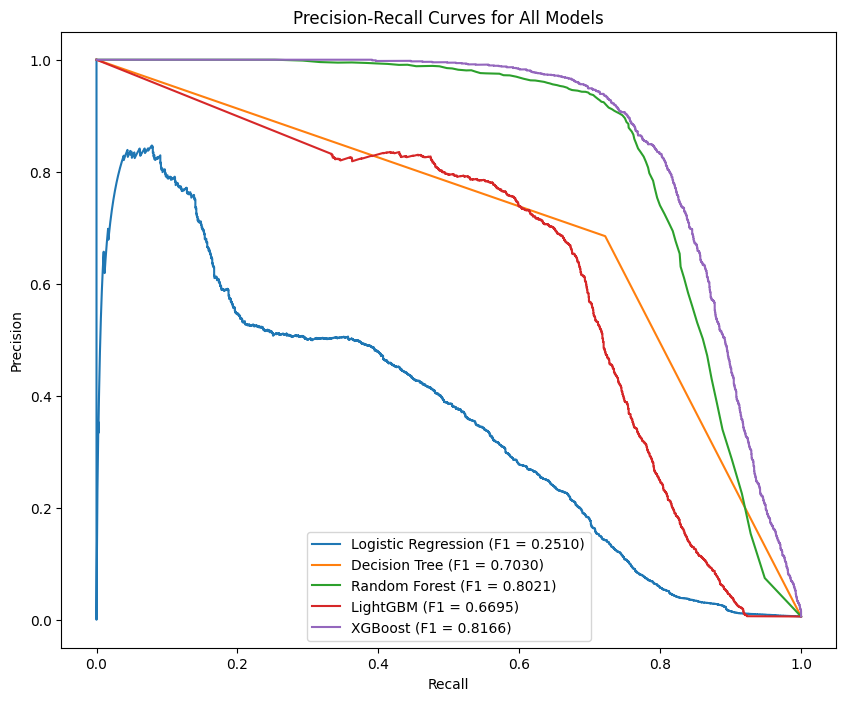

In [114]:
# Initialize models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb

# Create base models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    trained_model, metrics = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, name)
    results[name] = {
        'model': trained_model,
        'metrics': metrics
    }

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
for name, result in results.items():
    metrics = result['metrics']
    fpr, tpr, _ = roc_curve(y_test, metrics['y_pred_proba'])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {metrics['roc_auc']:.4f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.show()

# Plot Precision-Recall curves for all models
plt.figure(figsize=(10, 8))
for name, result in results.items():
    metrics = result['metrics']
    precision, recall, _ = precision_recall_curve(y_test, metrics['y_pred_proba'])
    plt.plot(recall, precision, label=f"{name} (F1 = {metrics['f1']:.4f})")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for All Models')
plt.legend()
plt.show()


# Key Observations
## Ensemble Methods Superiority

- All ensemble methods (XGBoost, Random Forest, LightGBM) outperform single models.
- XGBoost's superior performance suggests it handles class imbalance better.

## Performance Gaps
### Clear performance tiers:

- Tier 1: XGBoost (AUC = 0.9955, F1 = 0.8166)
- Tier 2: Random Forest (AUC = 0.9703, F1 = 0.8021)
- Tier 3: LightGBM (AUC = 0.9157, F1 = 0.6695)
- Tier 4: Logistic Regression (AUC = 0.9142, F1 = 0.2510)
- Tier 5: Decision Tree (AUC = 0.8600, F1 = 0.7030)

### Practical Implication
- For fraud detection, false positives are costly (legitimate transactions flagged as fraud).
- XGBoost achieves the highest true positive rate while maintaining strong precision.
- Random Forest also performs well, but its recall is slightly lower.
- The ROC curve shows that XGBoost generalizes best, with a nearly perfect AUC score of 0.9955.
- The Precision-Recall curve confirms that ensemble models (XGBoost, Random Forest, LightGBM) outperform single models in fraud detection.

In [148]:
# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1],
        'penalty': ['l2'],
        'solver': ['liblinear']
    },

    'Decision Tree': {
        'max_depth': [10, 15],
        'min_samples_split': [5],
        'min_samples_leaf': [2]
    },

    'Random Forest': {
        'n_estimators': [100],
        'max_depth': [15],
        'min_samples_leaf': [2]
    },

    'LightGBM': {
        'n_estimators': [100],
        'max_depth': [10],
        'learning_rate': [0.1]
    },

    'XGBoost': {
        'n_estimators': [100],
        'max_depth': [5],
        'learning_rate': [0.1]
    }
}

# Perform hyperparameter tuning for each model
tuned_models = {}
for name, model in models.items():
    print(f"\nTuning {name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=3, scoring='f1', n_jobs=-1, verbose=1, return_train_score=False)
    grid_search.fit(X_train_scaled, y_train)

    print(f"Best parameters for {name}: {grid_search.best_params_}")
    tuned_models[name] = grid_search.best_estimator_






Tuning Logistic Regression...
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

Tuning Decision Tree...
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters for Decision Tree: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5}

Tuning Random Forest...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for Random Forest: {'max_depth': 15, 'min_samples_leaf': 2, 'n_estimators': 100}

Tuning LightGBM...
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5254, number of negative: 902418
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.116337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1617
[LightGBM] [Info] Number of data points in the train set: 907672, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005788 -> initscore=-5.146088
[LightGBM] [Info] Start training from score -5.146088
Best parameters for LightGBM: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}

Tuning XGBoost...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [149]:
# Evaluate tuned models
tuned_results = {}
for name, model in tuned_models.items():
    print(f"\nEvaluating tuned {name}...")
    trained_model, metrics = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, f"Tuned {name}")
    tuned_results[name] = {
        'model': trained_model,
        'metrics': metrics
    }




Evaluating tuned Logistic Regression...

Tuned Logistic Regression Performance:
Accuracy: 0.9947
Precision: 0.6891
Recall: 0.1545
F1 Score: 0.2524
ROC AUC: 0.9140

Confusion Matrix:
[[386594    157]
 [  1904    348]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386751
           1       0.69      0.15      0.25      2252

    accuracy                           0.99    389003
   macro avg       0.84      0.58      0.62    389003
weighted avg       0.99      0.99      0.99    389003


Evaluating tuned Decision Tree...

Tuned Decision Tree Performance:
Accuracy: 0.9975
Precision: 0.8392
Recall: 0.6932
F1 Score: 0.7592
ROC AUC: 0.9274

Confusion Matrix:
[[386452    299]
 [   691   1561]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386751
           1       0.84      0.69      0.76      2252

    accuracy                         

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5254, number of negative: 902418
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.106679 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1617
[LightGBM] [Info] Number of data points in the train set: 907672, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005788 -> initscore=-5.146088
[LightGBM] [Info] Start training from score -5.146088


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Tuned LightGBM Performance:
Accuracy: 0.9970
Precision: 0.7773
Recall: 0.6741
F1 Score: 0.7220
ROC AUC: 0.9538

Confusion Matrix:
[[386316    435]
 [   734   1518]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386751
           1       0.78      0.67      0.72      2252

    accuracy                           1.00    389003
   macro avg       0.89      0.84      0.86    389003
weighted avg       1.00      1.00      1.00    389003


Evaluating tuned XGBoost...

Tuned XGBoost Performance:
Accuracy: 0.9977
Precision: 0.8917
Recall: 0.6834
F1 Score: 0.7738
ROC AUC: 0.9915

Confusion Matrix:
[[386564    187]
 [   713   1539]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386751
           1       0.89      0.68      0.77      2252

    accuracy                           1.00    389003
   macro avg       0.94      0.84      0.89    

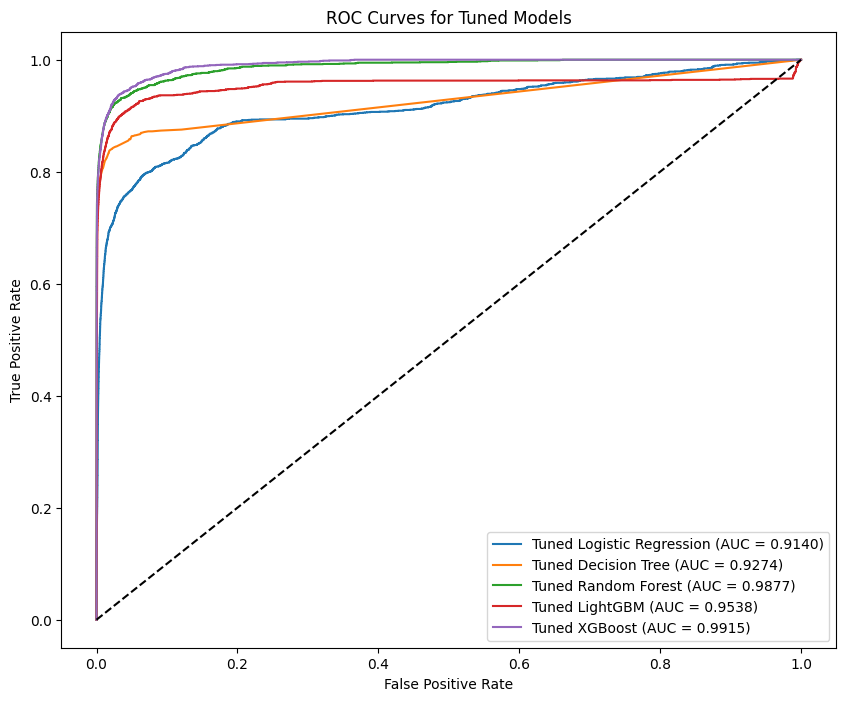

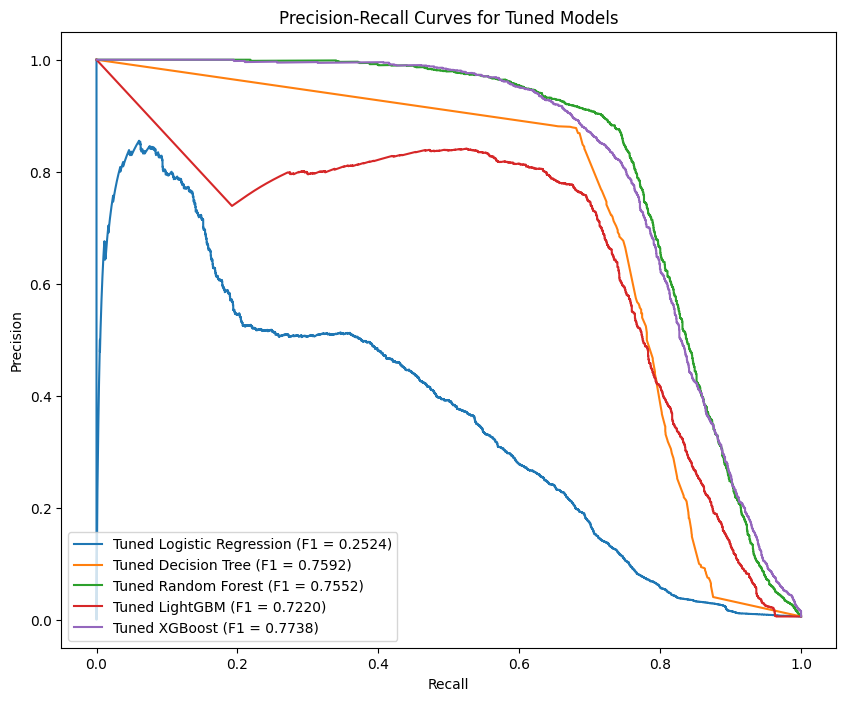

In [150]:
# Plot ROC curves for tuned models
plt.figure(figsize=(10, 8))
for name, result in tuned_results.items():
    metrics = result['metrics']
    fpr, tpr, _ = roc_curve(y_test, metrics['y_pred_proba'])
    plt.plot(fpr, tpr, label=f"Tuned {name} (AUC = {metrics['roc_auc']:.4f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Tuned Models')
plt.legend()
plt.show()

# Plot Precision-Recall curves for tuned models
plt.figure(figsize=(10, 8))
for name, result in tuned_results.items():
    metrics = result['metrics']
    precision, recall, _ = precision_recall_curve(y_test, metrics['y_pred_proba'])
    plt.plot(recall, precision, label=f"Tuned {name} (F1 = {metrics['f1']:.4f})")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Tuned Models')
plt.legend()
plt.show()


In [151]:
# Find the best model based on F1 score
best_model_name = max(tuned_results, key=lambda x: tuned_results[x]['metrics']['f1'])
best_model = tuned_results[best_model_name]['model']
print(f"\nBest model: {best_model_name} with F1 score: {tuned_results[best_model_name]['metrics']['f1']:.4f}")


Best model: XGBoost with F1 score: 0.7738


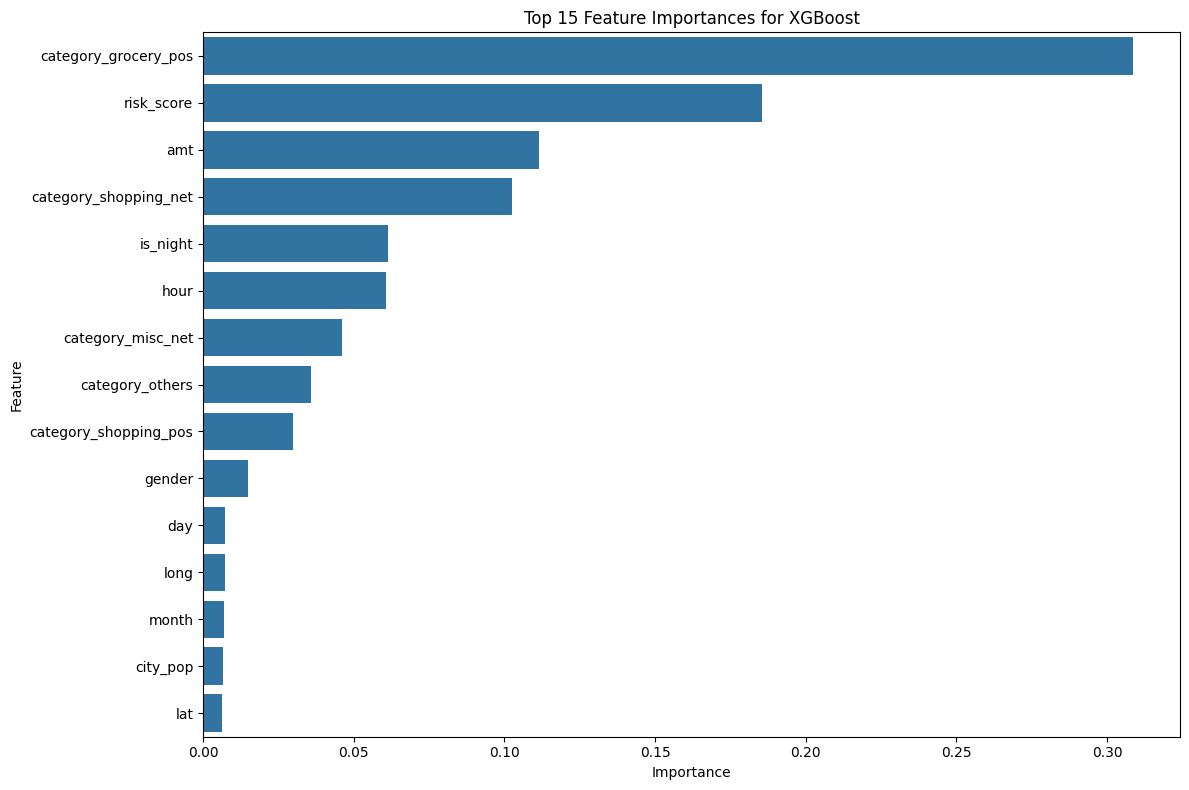

In [153]:

# Feature importance for the best model
if best_model_name in ['Random Forest', 'LightGBM', 'XGBoost']:
    # Get feature importances
    if best_model_name == 'Random Forest':
        importances = best_model.feature_importances_
    elif best_model_name == 'LightGBM':
        importances = best_model.feature_importances_
    else:  # XGBoost
        importances = best_model.feature_importances_

    # Create a DataFrame for visualization
    feature_importance_df = pd.DataFrame({
        'Feature': X_train_featured.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    # Plot feature importances
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15))
    plt.title(f'Top 15 Feature Importances for {best_model_name}')
    plt.tight_layout()
    plt.show()


Generating SHAP values for model explanation...


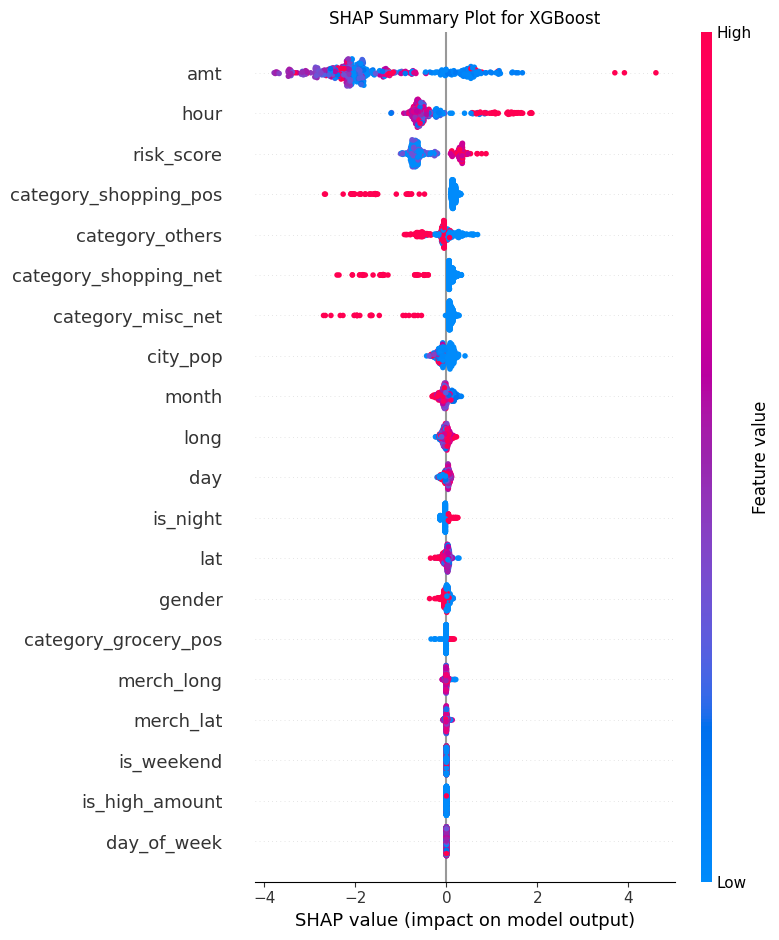

<Figure size 1000x800 with 0 Axes>

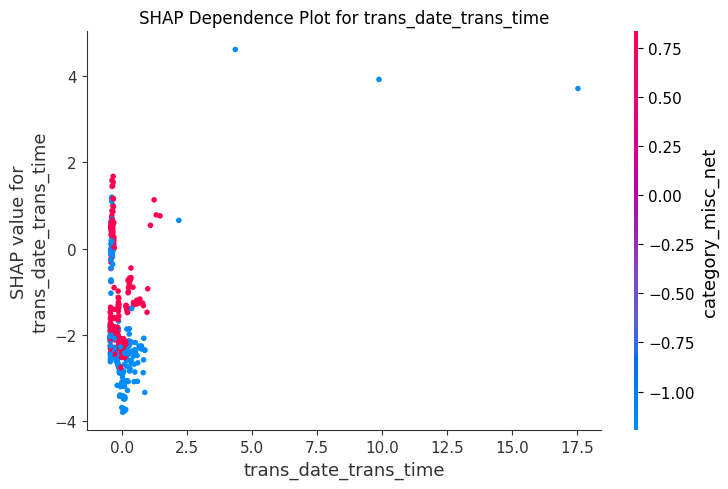

In [156]:
# Explainable AI with SHAP
import shap

# Create a SHAP explainer for the best model
if best_model_name in ['Random Forest', 'LightGBM', 'XGBoost']:
    print("\nGenerating SHAP values for model explanation...")

    # Sample a subset of the test data for SHAP analysis (for computational efficiency)
    X_test_sample = X_test_scaled[:500]

    # Create explainer
    if best_model_name == 'Random Forest':
        explainer = shap.TreeExplainer(best_model)
    elif best_model_name == 'LightGBM':
        explainer = shap.TreeExplainer(best_model)
    else:  # XGBoost
        explainer = shap.TreeExplainer(best_model)

    # Calculate SHAP values
    shap_values = explainer.shap_values(X_test_sample)

    # Summary plot
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X_test_sample, feature_names=X_train_featured.columns, show=False)
    plt.title(f'SHAP Summary Plot for {best_model_name}')
    plt.tight_layout()
    plt.show()

    # Dependence plot for the most important feature
    most_important_feature_idx = np.argmax(np.abs(shap_values).mean(axis=0))
    most_important_feature = X.columns[most_important_feature_idx]

    plt.figure(figsize=(10, 8))
    shap.dependence_plot(most_important_feature_idx, shap_values, X_test_sample,
                         feature_names=X.columns, show=False)
    plt.title(f'SHAP Dependence Plot for {most_important_feature}')
    plt.tight_layout()
    plt.show()


# Prepare ML Pipleline

In [6]:
"""
Configuration settings for the fraud detection pipeline.
"""

import os
from pathlib import Path

# Project root directory
ROOT_DIR = "/content/drive/MyDrive/dataset"

# Data paths
DATA_DIR = os.path.join(ROOT_DIR, 'fraud-detection-dataset')
MODEL_DIR = os.path.join(ROOT_DIR, 'model')

# Model artifacts
PIPELINE_PATH = os.path.join(MODEL_DIR, 'fraud_detection_pipeline.joblib')
SCALER_PATH = os.path.join(MODEL_DIR, 'scaler.pkl')

# Feature settings
IMPORTANT_CATEGORIES = [
    'grocery_pos',
    'shopping_net',
    'misc_net',
    'shopping_pos',
    'gas_transport'
]

# Model parameters
RANDOM_STATE = 42
TEST_SIZE = 0.3

# Threshold settings
HIGH_AMOUNT_THRESHOLD = 200.0
NIGHT_START_HOUR = 23
NIGHT_END_HOUR = 5

# Risk score weights
RISK_WEIGHTS = {
    'is_night': 0.2,
    'is_weekend': 0.1,
    'is_high_amount': 0.3
}

In [100]:
"""
Feature engineering transformers for the fraud detection pipeline.
"""

import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class MissingValueHandler(BaseEstimator, TransformerMixin):
    """Handles missing values in the dataset."""

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        # Fill numeric columns with median
        numeric_columns = X.select_dtypes(include=[np.number]).columns
        X[numeric_columns] = X[numeric_columns].fillna(X[numeric_columns].median())

        # Fill categorical columns with mode
        categorical_columns = X.select_dtypes(exclude=[np.number]).columns
        X[categorical_columns] = X[categorical_columns].fillna(X[categorical_columns].mode().iloc[0])

        return X

class FraudFeatureTransformer(BaseEstimator, TransformerMixin):
    """Creates fraud detection features based on domain knowledge."""

    def __init__(self):
        # Sort categories to ensure consistent order
        self.all_categories = sorted(['grocery_pos', 'misc_net', 'others',
                                    'shopping_net', 'shopping_pos'])
                                    # , 'gas_transport'])

        # Define the exact order of columns that will be output
        self.output_columns = ['amt', 'gender', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long'] + [f'category_{cat}' for cat in self.all_categories] + ['hour', 'day', 'month', 'day_of_week', 'is_night', 'is_weekend', 'is_high_amount', 'risk_score']

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        # Convert transaction datetime
        X['datetime'] = pd.to_datetime(X['trans_date_trans_time'])

        # Extract time-based features
        X['hour'] = X['datetime'].dt.hour
        X['day_of_week'] = X['datetime'].dt.dayofweek
        X['month'] = X['datetime'].dt.month

        # Create binary flags
        X['is_night'] = ((X['hour'] >= NIGHT_START_HOUR) |
                        (X['hour'] <= NIGHT_END_HOUR)).astype(int)
        X['is_weekend'] = (X['day_of_week'].isin([5, 6])).astype(int)
        X['is_high_amount'] = (X['amt'] > HIGH_AMOUNT_THRESHOLD).astype(int)

        # Handle categories - vectorized operations
        X['category'] = X['category'].apply(
            lambda x: x if x in IMPORTANT_CATEGORIES else 'others'
        )

        # Initialize category columns with zeros
        for cat in self.all_categories:
            X[f'category_{cat}'] = 0

        # Set category values using vectorized operation
        for cat in self.all_categories:
            X.loc[X['category'] == cat, f'category_{cat}'] = 1

        # Encode gender (M=1, F=0)
        if 'gender' in X.columns:
            X['gender'] = (X['gender'] == 'M').astype(int)

        # Calculate risk score
        X['risk_score'] = (
            X['is_night'] * RISK_WEIGHTS['is_night'] +
            X['is_weekend'] * RISK_WEIGHTS['is_weekend'] +
            X['is_high_amount'] * RISK_WEIGHTS['is_high_amount']
        )

        # Drop unnecessary columns
        columns_to_drop = [
            'trans_date_trans_time', 'datetime', 'category',
            'cc_num', 'merchant', 'first', 'last', 'street',
            'city', 'state', 'zip', 'job', 'dob', 'trans_num',
            'unix_time'
        ]

        # Only drop columns that exist
        columns_to_drop = [col for col in columns_to_drop if col in X.columns]
        X = X.drop(columns=columns_to_drop)

        # Ensure columns are in the correct order
        missing_cols = set(self.output_columns) - set(X.columns)
        for col in missing_cols:
            X[col] = 0

        return X[self.output_columns]

In [101]:
"""
Training script for the fraud detection model.
"""

import os
import joblib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

def load_data(data_path):
    """Load the fraud detection dataset."""
    return pd.read_csv(data_path)

def create_pipeline():
    """Create the fraud detection pipeline."""
    return Pipeline(steps=[
        ('missing_handler', MissingValueHandler()),
        ('feature_engineer', FraudFeatureTransformer()),
        ('scaler', StandardScaler()),
        ('classifier', XGBClassifier(
            n_estimators=100,
            max_depth=5,
            learning_rate=0.1,
            random_state=RANDOM_STATE,
            n_jobs=-1,
            tree_method='hist'
        ))
    ], memory='./cache')

def evaluate_model(model, X_test, y_test):
    """Evaluate the model and print metrics."""
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    print("\nModel Performance:")
    print(classification_report(y_test, y_pred))
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")


"""Main training function."""
# Create model directory if it doesn't exist
os.makedirs(MODEL_DIR, exist_ok=True)

# Load data
print("Loading data...")
data_path = os.path.join(DATA_DIR, "fraudTrain.csv")
df = load_data(data_path)

# Split features and target
X = df.drop(['is_fraud'], axis=1)
y = df['is_fraud']

# Split train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)

# Create and train pipeline
print("Training model...")
pipeline = create_pipeline()
pipeline.fit(X_train, y_train)

# Evaluate model
print("Evaluating model...")
evaluate_model(pipeline, X_test, y_test)

# Save pipeline
print(f"Saving pipeline to {PIPELINE_PATH}...")
joblib.dump(pipeline, PIPELINE_PATH)
print("Training completed!")

Loading data...
Training model...


/usr/local/lib/python3.11/dist-packages/joblib/memory.py:577: UserWarning: Persisting input arguments took 0.83s to run.If this happens often in your code, it can cause performance problems (results will be correct in all cases). The reason for this is probably some large input arguments for a wrapped function.
  return self._cached_call(args, kwargs, shelving=False)[0]


Evaluating model...

Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386751
           1       0.89      0.68      0.77      2252

    accuracy                           1.00    389003
   macro avg       0.94      0.84      0.89    389003
weighted avg       1.00      1.00      1.00    389003

ROC AUC Score: 0.9915
Saving pipeline to /content/drive/MyDrive/dataset/model/fraud_detection_pipeline.joblib...
Training completed!


In [102]:
"""
Prediction script for the fraud detection model.
"""

import joblib
import pandas as pd

def load_pipeline():
    """Load the trained pipeline."""
    return joblib.load(PIPELINE_PATH)

def predict_transaction(transaction_data, pipeline=None):
    """
    Predict whether a transaction is fraudulent.

    Args:
        transaction_data (dict or pd.DataFrame): Transaction data to predict
        pipeline (Pipeline, optional): Loaded pipeline. If None, will load from disk

    Returns:
        dict: Prediction results containing fraud probability and binary prediction
    """
    # Load pipeline if not provided
    if pipeline is None:
        pipeline = load_pipeline()

    # Convert dictionary to DataFrame if needed
    if isinstance(transaction_data, dict):
        transaction_data = pd.DataFrame([transaction_data])

    # Make prediction
    prediction = pipeline.predict(transaction_data)
    probability = pipeline.predict_proba(transaction_data)[:, 1]

    return {
        'is_fraud': bool(prediction[0]),
        'fraud_probability': float(probability[0])
    }

def predict_batch(transactions, pipeline=None):
    """
    Predict fraud for multiple transactions.

    Args:
        transactions (pd.DataFrame): DataFrame containing multiple transactions
        pipeline (Pipeline, optional): Loaded pipeline. If None, will load from disk

    Returns:
        pd.DataFrame: Original data with predictions added
    """
    # Load pipeline if not provided
    if pipeline is None:
        pipeline = load_pipeline()

    # Make predictions
    predictions = pipeline.predict(transactions)
    probabilities = pipeline.predict_proba(transactions)[:, 1]

    # Add predictions to DataFrame
    results = transactions.copy()
    results['is_fraud_predicted'] = predictions
    results['fraud_probability'] = probabilities

    return results

if __name__ == "__main__":
    # Example usage
    example_transaction = {
        'trans_date_trans_time': '2023-01-01 02:45:00',
        'amt': 999.99,
        'category': 'shopping_net',
        'gender': 'M',
    }

    result = predict_transaction(example_transaction)
    print("\nPrediction for example transaction:")
    print(f"Is Fraud: {result['is_fraud']}")
    print(f"Fraud Probability: {result['fraud_probability']:.4f}")


Prediction for example transaction:
Is Fraud: False
Fraud Probability: 0.2713


In [ ]:
transaction = {
    'trans_date_trans_time': '2023-01-01 02:45:00',
    'amt': 999.99,
    'category': 'shopping_net',
    'gender': 'M'
}

result = predict_transaction(transaction)
print(f"Is Fraud: {result['is_fraud']}")
print(f"Fraud Probability: {result['fraud_probability']}")

Loading trained model...
Loading test data...
Making predictions...
Evaluating model performance...

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.85      0.61      0.71      2145

    accuracy                           1.00    555719
   macro avg       0.93      0.80      0.85    555719
weighted avg       1.00      1.00      1.00    555719


ROC AUC Score: 0.9883

Generating performance plots...


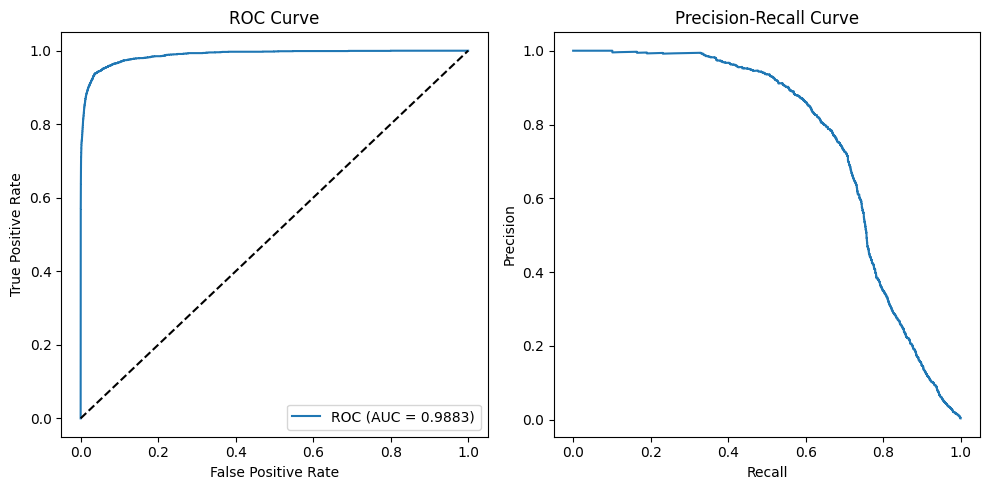


Analyzing feature importance...


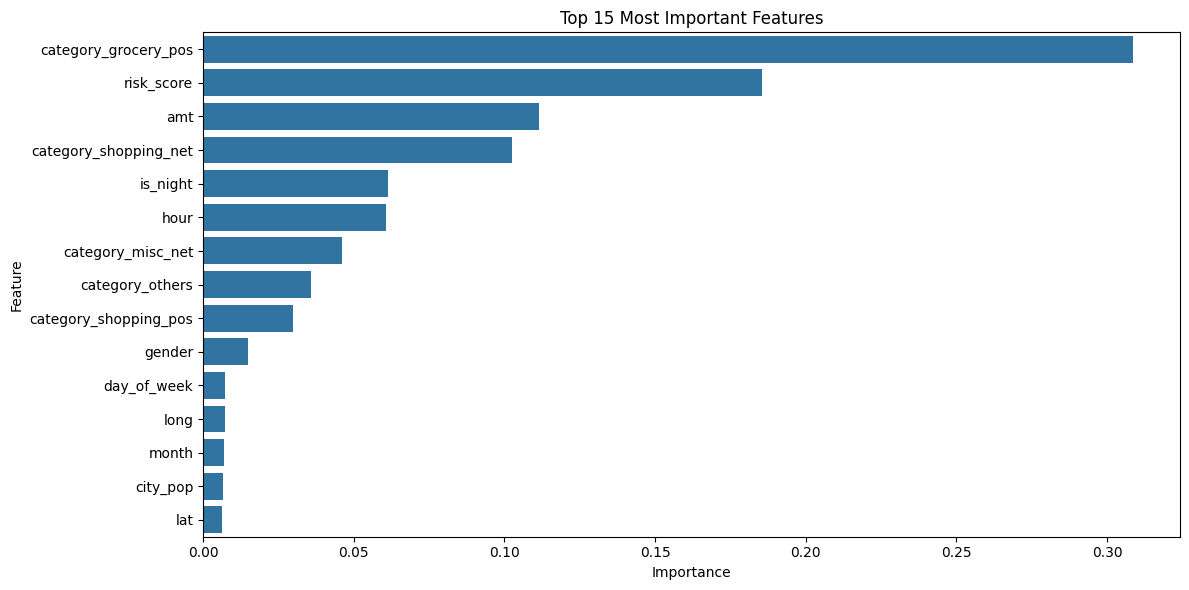


Top 10 Most Important Features:
                  Feature  Importance
7    category_grocery_pos    0.308722
19             risk_score    0.185552
0                     amt    0.111426
10  category_shopping_net    0.102478
16               is_night    0.061468
12                   hour    0.060822
8       category_misc_net    0.046187
9         category_others    0.035841
11  category_shopping_pos    0.029948
1                  gender    0.015001


In [117]:
"""
Script to evaluate the trained model on the test dataset.
"""

import os
import joblib
import pandas as pd
import numpy as np
from sklearn.metrics import (
    classification_report, roc_auc_score,
    precision_recall_curve, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

def load_test_data():
    """Load the test dataset."""
    useful_columns = [
        'trans_date_trans_time', 'category', 'amt',
        'gender', 'lat', 'long', 'city_pop',
        'merch_lat', 'merch_long', 'is_fraud'
    ]
    return pd.read_csv(os.path.join(DATA_DIR, "fraudTest.csv"), usecols=useful_columns)

def evaluate_model(y_true, y_pred, y_pred_proba):
    """Evaluate model performance and print metrics."""
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    # Calculate and print ROC AUC
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    print(f"\nROC AUC Score: {roc_auc:.4f}")

    return {
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

def plot_results(y_true, results):
    """Plot ROC and Precision-Recall curves."""
    # Create ROC curve
    fpr, tpr, _ = roc_curve(y_true, results['y_pred_proba'])
    plt.figure(figsize=(10, 5))

    # Plot ROC curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'ROC (AUC = {results["roc_auc"]:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

    # Plot Precision-Recall curve
    plt.subplot(1, 2, 2)
    precision, recall, _ = precision_recall_curve(y_true, results['y_pred_proba'])
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')

    plt.tight_layout()
    plt.show()

def analyze_feature_importance(pipeline, X_test):
    """Analyze and plot feature importance."""
    # Get feature importance from the model
    feature_importance = pipeline.named_steps['classifier'].feature_importances_
    feature_names = X_test.columns

    # Create DataFrame for visualization
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance
    }).sort_values('Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(12, 6))
    sns.barplot(data=importance_df.head(15), x='Importance', y='Feature')
    plt.title('Top 15 Most Important Features')
    plt.tight_layout()
    plt.show()

    return importance_df

def main():
    """Main evaluation function."""
    # Load the trained pipeline
    print("Loading trained model...")
    pipeline = joblib.load(PIPELINE_PATH)

    # Load test data
    print("Loading test data...")
    test_data = load_test_data()

    # Split features and target
    X_test = test_data.drop(['is_fraud'], axis=1)
    y_test = test_data['is_fraud']

    # Make predictions
    print("Making predictions...")
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

    # Evaluate model
    print("Evaluating model performance...")
    results = evaluate_model(y_test, y_pred, y_pred_proba)

    # Plot results
    print("\nGenerating performance plots...")
    plot_results(y_test, results)

    # Analyze feature importance
    print("\nAnalyzing feature importance...")
    X_test_transformed = pipeline.named_steps['feature_engineer'].transform(X_test)
    importance_df = analyze_feature_importance(pipeline, X_test_transformed)

    # Print top 10 most important features
    print("\nTop 10 Most Important Features:")
    print(importance_df.head(10))

if __name__ == "__main__":
    main()